# Exercise 4

**Use the functions from timestamp.py in exercise 3**

Reference:
timestamp.py
function.ipynb
function2.ipynb

In [1]:
from datetime import datetime
from timestamp import unix_time
from timestamp import date_time
from pytz import timezone
from pytz import utc
from ROOT import TCanvas, TGraph
from array import array

Welcome to JupyROOT 6.18/04


In [2]:
doc = open("bme680.dat", "r")

In [3]:
data = doc.read().splitlines()

In [22]:
temperature = {}
humidity = {}
pressure = {}

In [23]:
for line in data:
    column = line.split()
    
    date = column[0]
    time = column[1]
    
    temperature[unix_time(date,time)] = float(column[2])
    humidity[unix_time(date,time)] = float(column[3])
    pressure[unix_time(date,time)] = float(column[4])


In [24]:
C1 = TCanvas('canvas', 'Temperature', 200, 10, 1000, 700)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


In [25]:
x,y = array('d'), array('d')
xsel, ysel = array( 'd' ), array( 'd' )

In [26]:
Date1 = '2020-01-11'
Time1 = '08:00:00'
Date2 = '2020-01-11'
Time2 = '15:00:00'

In [27]:
timestamp1 = unix_time(Date1, Time1)
timestamp2 = unix_time(Date2, Time2)

In [28]:
n = len(x)

In [29]:
xmin = float(timestamp1)
xmax = float(timestamp2)
type(time)

str

In [30]:
for time,temp in temperature.items():
    type(time)
    if time>=xmin and time<=xmax:
        xsel.append(time)
        ysel.append(temp)

In [45]:
gr = TGraph(len(xsel), xsel, ysel)
gr.SetLineWidth(2)
gr.SetLineColor(4)
gr.GetXaxis().SetTimeDisplay(1)
gr.GetXaxis().SetTimeFormat("%Y/%m/%d %H:%M:%S %F1970-01-01 00:00:00");
gr.GetXaxis().SetNdivisions(404)

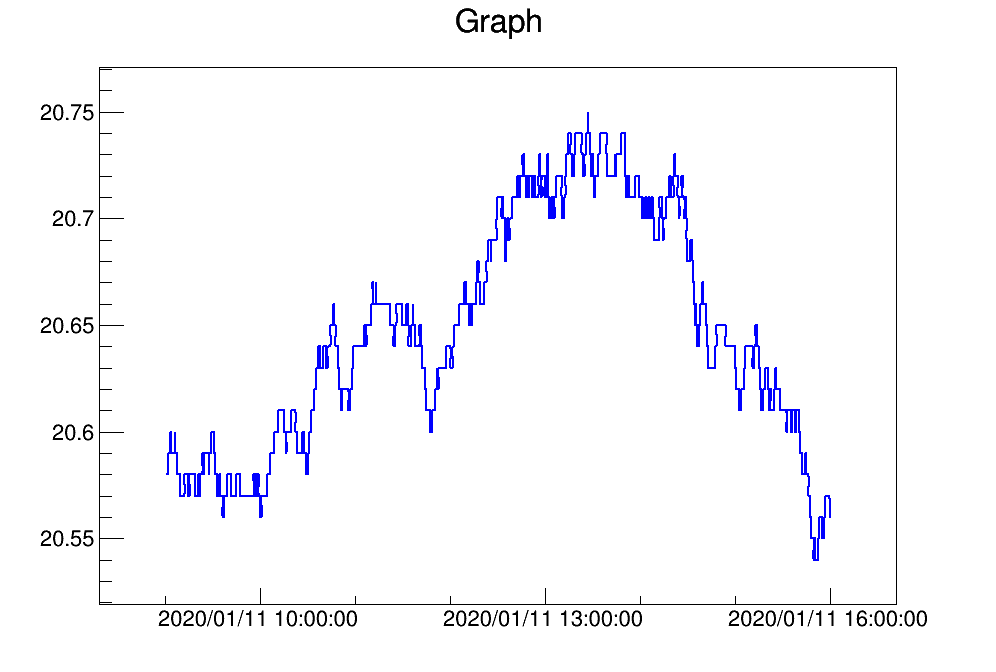

In [46]:
C1.Draw()
gr.Draw( 'AC' )